<a href="https://colab.research.google.com/github/Akinlaso/model_development/blob/main/model_development_used_car_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
#await skillsnetwork.download(filepath, './usedcars.csv')
#path = './usedcars.csv'
df = pd.read_csv('/content/automobileEDA(1).csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
X = df[['highway-mpg']]
Y = df['price']

In [9]:
lm.fit(X,Y)

LinearRegression()

In [10]:
Yhat=lm.predict(X)
print(Yhat[0:5])

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [11]:
round((lm.intercept_), 2)

38423.31

In [12]:
lm.coef_

array([-821.73337832])

In [13]:
lm1 = LinearRegression()

In [14]:
X1 = df[['engine-size']]
Y1 = df['price']

In [15]:
lm1.fit(X1,Y1)

LinearRegression()

In [16]:
Yhat=lm1.predict(X1)
print(Yhat[0:5])

[13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775]


In [17]:
round((lm1.intercept_), 2)

-7963.34

In [18]:
lm1.coef_

array([166.86001569])

In [19]:
# model equation
#Yhat=a+bX
# Price = -7963.34 + 166.86*engine-size

In [20]:
#MULTIPLE LINEAR REGRESSION
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [21]:
lm.fit(Z, df['price'])

LinearRegression()

In [22]:
round((lm.intercept_), 2)

-15806.62

In [23]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [24]:
# As we saw above, we should get a final linear function with the structure:
# Yhat=a+b1X1+b2X2+b3X3+b4X4

In [25]:
# Price = -15806.62 + 53.49574423*horsepower + 4.70770099*curb-weight + 81.53026382*engine-size + 36.05748882*highway-mpg

In [26]:
# MULTIPLE LINEAR REGRESSION EXERCISE

In [27]:
w = df[["normalized-losses", "highway-mpg"]]

In [28]:
lm2 = LinearRegression()

In [29]:
lm2.fit(w, df['price'])

LinearRegression()

In [30]:
round((lm2.intercept_), 2)

38201.31

In [31]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [32]:
# As we saw above, we should get a final linear function with the structure:
# Yhat=a+b1X1+b2X2

In [33]:
# Price = 38201.31 + 1.49789586*normalized-losses -820.45434016 *highway-mpg

In [34]:
import seaborn as sns
%matplotlib inline

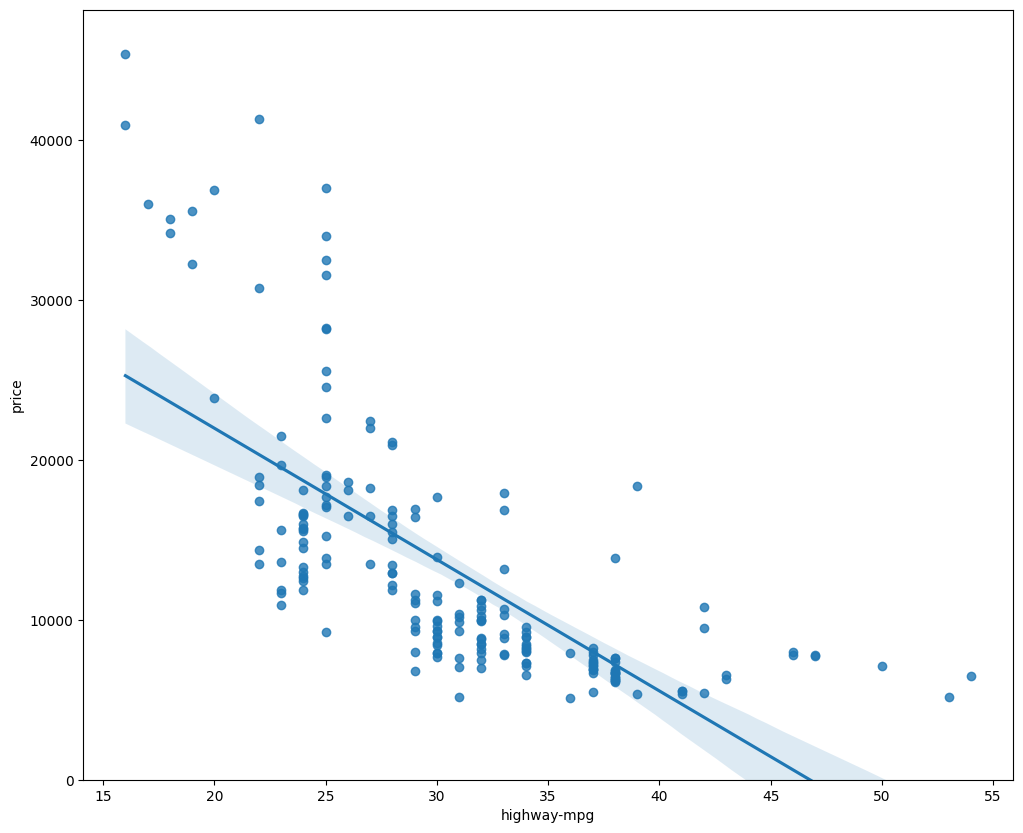

In [35]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,);

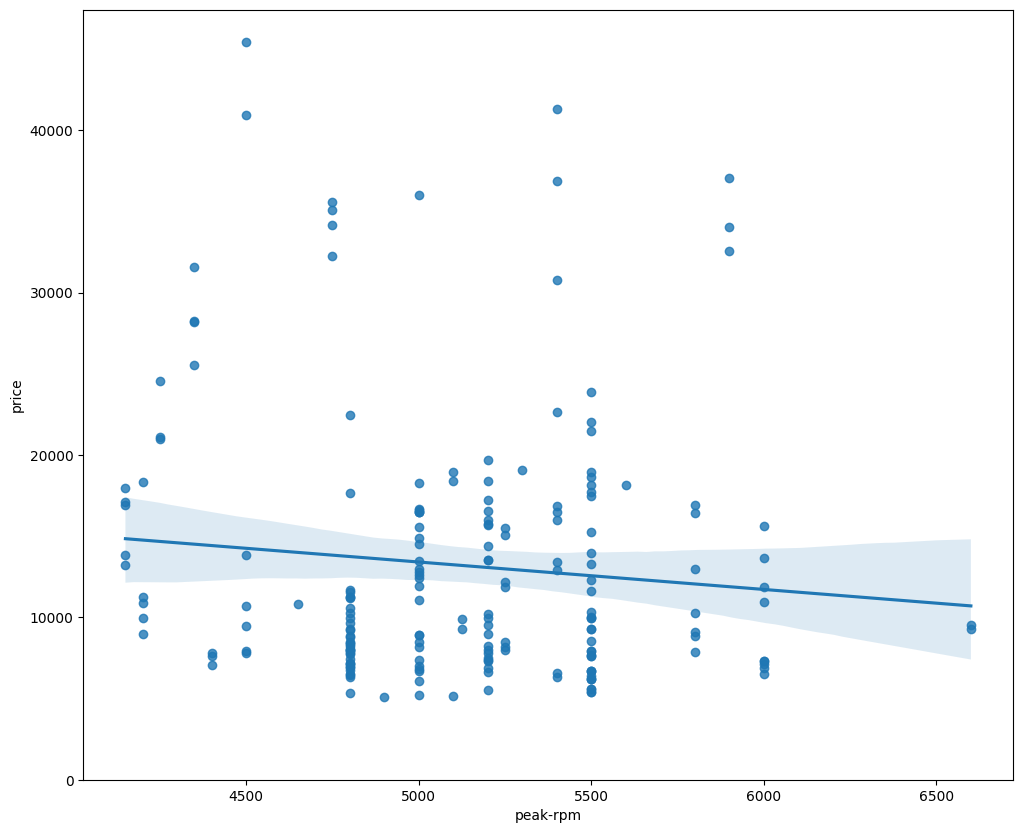

In [36]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,);

In [37]:
# to confirm the significant influence on independent variables on "price" (the dependent)
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


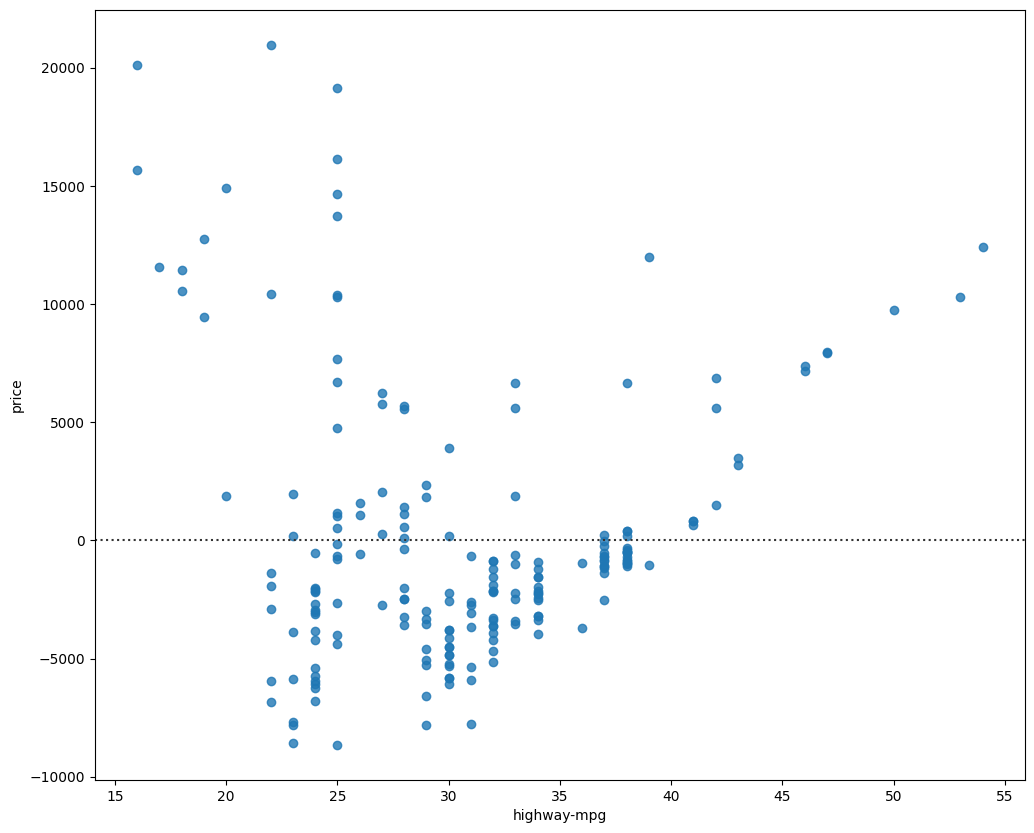

In [41]:
# Residual Plot
# Residual Plot is to determine whether or not a linear model is suitable or appropriate for a given data
# If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
#Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.
# If the points show no pattern, that is, the points are randomly dispersed, we can conclude that a linear model is an appropriate model.
#If the points show a curved pattern, such as a U-shaped pattern, we can conclude that a linear model is not appropriate and that
# a non-linear model might fit better.

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [40]:
Y_hat = lm.predict(Z)

In [ ]:
#How to visualize Multiple Linear Regression

#How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

#One way to look at the fit of the model is by looking at the distribution plot.

#We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.




<ipython-input-46-fccedabca2c6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-46-fccedabca2c6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

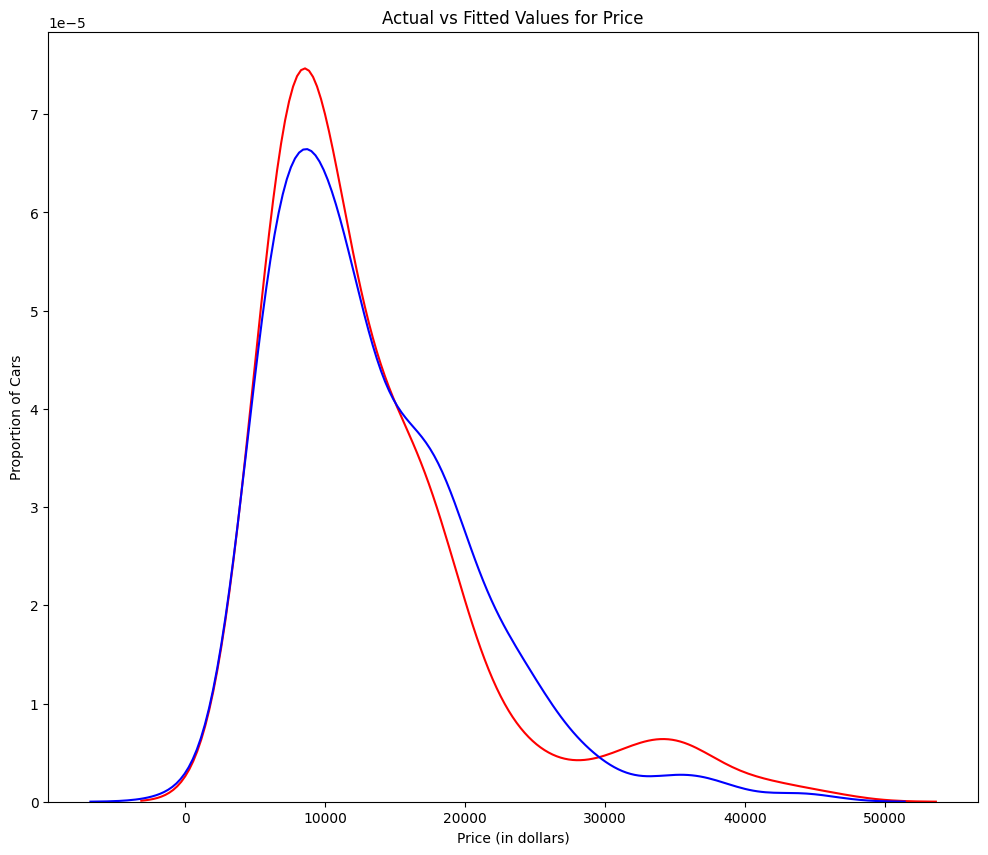

In [46]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close();

In [55]:
#Polynomial Regression and Pipelines

#Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

#We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

#There are different orders of polynomial regression:
#Quadratic - 2nd Order
#Yhat=a+b1X+b2X2
#Cubic - 3rd Order
#Yhat=a+b1X+b2X2+b3X3
#Higher-Order:
#Y=a+b1X+b2X2+b3X3....

#We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

#We will use the following function to plot the data:


In [49]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [56]:
#Let's get the variables:

In [50]:
x = df['highway-mpg']
y = df['price']

In [57]:
#Let's fit the polynomial using the function #polyfit, then use the function #poly1d to display the polynomial function.

In [51]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


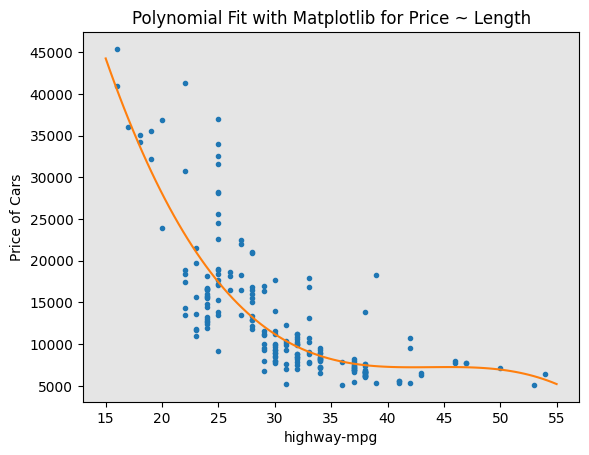

In [52]:
PlotPolly(p, x, y, 'highway-mpg')

In [53]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [54]:
# np.polyfit(x, y, 3)
# We can already see from plotting that this polynomial model performs better than the linear model.
#This is because the generated polynomial function "hits" more of the data points.

In [58]:
#Create 11 order polynomial model with the variables x and y from above.

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


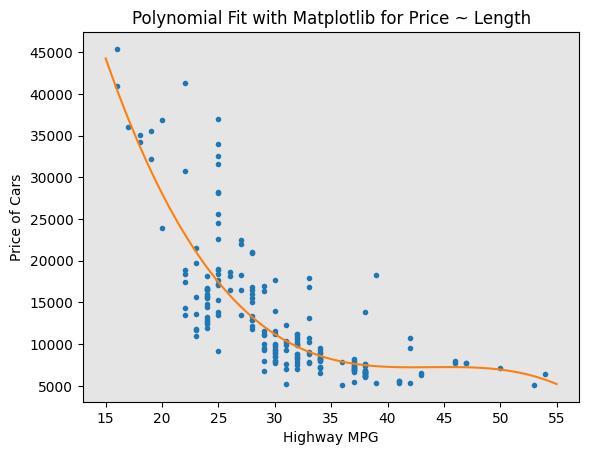

In [59]:
# Here we use a polynomial of the 11th order (undecic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [63]:
#The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

#Yhat=a+b1X1+b2X2+b3X1X2+b4X21+b5X22

In [64]:
#We can perform a polynomial transform on multiple features. First, we import the module:

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [71]:
#We create a PolynomialFeatures object of degree 2:

In [72]:
Z_pr=pr.fit_transform(Z)

In [69]:
Z.shape

(201, 4)

(201, 4)

In [70]:
#After the transformation, there are 201 samples and 15 features.

In [78]:
Z_pr.shape

(201, 15)

In [79]:
#Pipeline

#Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [82]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [83]:
#We input the list as an argument to the pipeline constructor:

In [91]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [85]:
#First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

#Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [86]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [87]:
 #Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [88]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [95]:
#EXERCISE WORK
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('model',LinearRegression())]

pipe=Pipeline(Input)
pipe

#Z = Z.astype(float) not necessary
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:14]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066])

In [96]:
#Measures for In-Sample Evaluation

#When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

#Two very important measures that are often used in Statistics to determine the accuracy of a model are:

#    R^2 / R-squared
#    Mean Squared Error (MSE)

#R-squared

#R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

#The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

#Mean Squared Error (MSE)

#The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

In [97]:
# Model 1: Simple Linear Regression

#Let's calculate the R^2:

In [98]:
#highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [99]:
# We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"

In [100]:
#Let's calculate the MSE:

#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [101]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [102]:
#Let's import the function mean_squared_error from the module metrics:


In [104]:
from sklearn.metrics import mean_squared_error

In [106]:
#We can compare the predicted results with the actual results:

In [105]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [107]:
#Model 2: Multiple Linear Regression

#Let's calculate the R^2:

In [108]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [109]:
#We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [110]:
#Let's calculate the MSE.

#We produce a prediction:

In [111]:
Y_predict_multifit = lm.predict(Z)

In [112]:
# We compare the predicted results with the actual results:

In [113]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [114]:
#Model 3: Polynomial Fit

#Let's calculate the R^2.

#Let’s import the function r2_score from the module metrics as we are using a different function.

In [115]:
from sklearn.metrics import r2_score

In [116]:
#We apply the function to get the value of R^2:

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [119]:
#We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [118]:
#MSE

#We can also calculate the MSE:

In [120]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [121]:
# 5. Prediction and Decision Making

#cPrediction

#In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction.

# Lets import pyplot for plotting; we will also be using some functions from numpy.


In [122]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [123]:
#Create a new input:

In [124]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [125]:
#Fit the model:

lm.fit(X, Y)
lm

LinearRegression()

In [126]:
# Produce a prediction:

yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

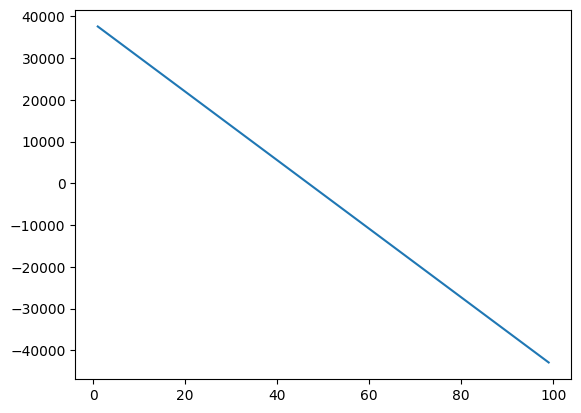

In [128]:
# We can plot the data:

plt.plot(new_input, yhat)
plt.show()

In [130]:
# Decision Making: Determining a Good Model Fit

# Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

#     What is a good R-squared value?

# When comparing models, the model with the higher R-squared value is a better fit for the data.

#     What is a good MSE?

# When comparing models, the model with the smallest MSE value is a better fit for the data.
# Let's take a look at the values for the different models.

# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

#     R-squared: 0.49659118843391759
#     MSE: 3.16 x10^7

# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

#     R-squared: 0.80896354913783497
#     MSE: 1.2 x10^7

# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

#     R-squared: 0.6741946663906514
#     MSE: 2.05 x 10^7


In [131]:
# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

# Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

# In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

#     MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
#     R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

# This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

In [133]:
# Simple Linear Model (SLR) vs. Polynomial Fit

#     MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
#     R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

# Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting
# "price" with "highway-mpg" as a predictor variable.

# Multiple Linear Regression (MLR) vs. Polynomial Fit

#     MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
#     R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

In [134]:
# Conclusion

# Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset.

# This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.